# Cross-Impact of Order Flow Imbalance in Equity Markets
Rama Cont, Mihai Cucuringu, and Chao Zhang

In [2]:
import databento as db
import pandas as pd
import numpy as np
import datetime
import itertools
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Download from DataBento
*Use only once to save raw file*

In [38]:
# client = db.Historical("db-SHTimf6iQqxGSENt5NJp7te63MkjP")
# symbols = ["AAPL", "AMGN", "TSLA", "JPM", "XOM"]
# start_date = datetime.datetime(2024, 12, 1, 0, 0, 0)
# end_date = datetime.datetime(2025, 1, 3, 0, 0, 0)

# for symbol in symbols:
#     current_date = start_date
#     df = pd.DataFrame()

#     while current_date < end_date:
#         next_date = current_date + datetime.timedelta(days=1)  # Fetch daily data
#         print(current_date, next_date)

#         data = client.timeseries.get_range(
#             dataset="XNAS.ITCH",
#             symbols=symbol,
#             schema="mbp-10",
#             start=current_date.strftime("%Y-%m-%dT%H:%M:%S"),
#             end=next_date.strftime("%Y-%m-%dT%H:%M:%S"),
#         )

#         tmp_df = data.to_df()
#         current_date = next_date
#         if len(tmp_df) == 0: continue
#         tmp_df.to_csv(f"../data/raw/{symbol}_mbp-10_{tmp_df.index.max().strftime('%Y-%m-%d')}.csv")

2024-12-07 00:00:00 2024-12-08 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_2316\3550041314.py:15: BentoWarning: No data found for the request you submitted. The request time range falls entirely inside a weekend.
  data = client.timeseries.get_range(


2024-12-08 00:00:00 2024-12-09 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_2316\3550041314.py:15: BentoWarning: No data found for the request you submitted.
  data = client.timeseries.get_range(


2024-12-09 00:00:00 2024-12-10 00:00:00
2024-12-10 00:00:00 2024-12-11 00:00:00
2024-12-11 00:00:00 2024-12-12 00:00:00
2024-12-12 00:00:00 2024-12-13 00:00:00
2024-12-13 00:00:00 2024-12-14 00:00:00
2024-12-14 00:00:00 2024-12-15 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_2316\3550041314.py:15: BentoWarning: No data found for the request you submitted. The request time range falls entirely inside a weekend.
  data = client.timeseries.get_range(


2024-12-15 00:00:00 2024-12-16 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_2316\3550041314.py:15: BentoWarning: No data found for the request you submitted.
  data = client.timeseries.get_range(


2024-12-16 00:00:00 2024-12-17 00:00:00
2024-12-17 00:00:00 2024-12-18 00:00:00
2024-12-18 00:00:00 2024-12-19 00:00:00
2024-12-19 00:00:00 2024-12-20 00:00:00
2024-12-20 00:00:00 2024-12-21 00:00:00
2024-12-21 00:00:00 2024-12-22 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_2316\3550041314.py:15: BentoWarning: No data found for the request you submitted. The request time range falls entirely inside a weekend.
  data = client.timeseries.get_range(


2024-12-22 00:00:00 2024-12-23 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_2316\3550041314.py:15: BentoWarning: No data found for the request you submitted.
  data = client.timeseries.get_range(


2024-12-23 00:00:00 2024-12-24 00:00:00
2024-12-24 00:00:00 2024-12-25 00:00:00
2024-12-25 00:00:00 2024-12-26 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_2316\3550041314.py:15: BentoWarning: No data found for the request you submitted.
  data = client.timeseries.get_range(


2024-12-26 00:00:00 2024-12-27 00:00:00
2024-12-27 00:00:00 2024-12-28 00:00:00
2024-12-28 00:00:00 2024-12-29 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_2316\3550041314.py:15: BentoWarning: No data found for the request you submitted. The request time range falls entirely inside a weekend.
  data = client.timeseries.get_range(


2024-12-29 00:00:00 2024-12-30 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_2316\3550041314.py:15: BentoWarning: No data found for the request you submitted.
  data = client.timeseries.get_range(


2024-12-30 00:00:00 2024-12-31 00:00:00
2024-12-31 00:00:00 2025-01-01 00:00:00
2025-01-01 00:00:00 2025-01-02 00:00:00


C:\Users\Austin\AppData\Local\Temp\ipykernel_2316\3550041314.py:15: BentoWarning: No data found for the request you submitted.
  data = client.timeseries.get_range(


2025-01-02 00:00:00 2025-01-03 00:00:00


## Illustration of the preprocessing workflow
*Skip to next subsection for production code*

Read raw data and preprocess

In [2]:
# Read
symbol = 'TSLA'
dt_str = '2024-12-05'

mpb10df = pd.read_csv(f"../data/raw/{symbol}_mbp-10_{dt_str}.csv", index_col=0)
mpb10df.index = pd.to_datetime(mpb10df.index)
mpb10df.head(5)

,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,...,ask_sz_08,bid_ct_08,ask_ct_08,bid_px_09,ask_px_09,bid_sz_09,ask_sz_09,bid_ct_09,ask_ct_09,symbol
ts_recv,,,,,,,,,,,,,,,,,,,,,
2024-12-05 09:00:00.032940084+00:00,2024-12-05 09:00:00.032773277+00:00,10,2,16244,A,N,0,392.76,14,130,...,0,0,0,NaN,NaN,0,0,0,0,TSLA
2024-12-05 09:00:00.033276942+00:00,2024-12-05 09:00:00.033110500+00:00,10,2,16244,A,A,1,960.00,25,130,...,0,0,0,NaN,NaN,0,0,0,0,TSLA
2024-12-05 09:00:00.127714470+00:00,2024-12-05 09:00:00.127545059+00:00,10,2,16244,A,B,0,356.24,100,130,...,0,0,0,NaN,NaN,0,0,0,0,TSLA
2024-12-05 09:00:00.127731067+00:00,2024-12-05 09:00:00.127562976+00:00,10,2,16244,A,A,0,356.72,100,130,...,0,0,0,NaN,NaN,0,0,0,0,TSLA
2024-12-05 09:00:00.128417526+00:00,2024-12-05 09:00:00.128250540+00:00,10,2,16244,C,A,0,356.72,100,130,...,0,0,0,NaN,NaN,0,0,0,0,TSLA


Calculate midprice $ P_{i,t} $

In [223]:
mpb10df['mid_price'] = mpb10df[['bid_px_00','ask_px_00']].sum(1) / 2

Following the definition of $ \text{OF}_{i,n}^{m,b} $ or $ \text{OF}_{i,n}^{m,a} $ in section 2.1 in the paper.

In [250]:
levels = [str(x).rjust(2, '0') for x in range(5)]
sides = ['bid', 'ask']
for level, side in itertools.product(levels, sides):
    price_col = f'{side}_px_{level}'
    qty_col   = f'{side}_ct_{level}'
    mpb10df[qty_col]   = mpb10df[qty_col].astype(int)
    mpb10df[f'prev_{price_col}'] = mpb10df[price_col].shift(1)
    mpb10df[f'prev_{qty_col}']   = mpb10df[qty_col].shift(1)
    mpb10df[f'{side}_of_{level}'] = 0.0
    if side == 'bid':
        mpb10df.loc[(mpb10df[price_col] > mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = mpb10df.loc[(mpb10df[price_col] > mpb10df[f'prev_{price_col}']), qty_col]
        mpb10df.loc[(mpb10df[price_col] < mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = -mpb10df.loc[(mpb10df[price_col] < mpb10df[f'prev_{price_col}']), qty_col]
        mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), qty_col] - mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), f'prev_{qty_col}']
    else:
        mpb10df.loc[(mpb10df[price_col] > mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = -mpb10df.loc[(mpb10df[price_col] > mpb10df[f'prev_{price_col}']), qty_col]
        mpb10df.loc[(mpb10df[price_col] < mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = mpb10df.loc[(mpb10df[price_col] < mpb10df[f'prev_{price_col}']), qty_col]
        mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), qty_col] - mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), f'prev_{qty_col}']

In [251]:
mpb10df.loc[f"{dt_str} 16:00":f"{dt_str} 16:00"]

,ts_event,rtype,publisher_id,instrument_id,action,side,depth,price,size,flags,...,bid_of_03,prev_ask_px_03,prev_ask_ct_03,ask_of_03,prev_bid_px_04,prev_bid_ct_04,bid_of_04,prev_ask_px_04,prev_ask_ct_04,ask_of_04
ts_recv,,,,,,,,,,,,,,,,,,,,,
2024-12-05 16:00:00.005944691+00:00,2024-12-05 16:00:00.005776268+00:00,10,2,16244,C,B,1,368.33,25,128,...,0.0,368.49,3.0,0.0,368.27,2.0,0.0,368.50,1.0,0.0
2024-12-05 16:00:00.005970467+00:00,2024-12-05 16:00:00.005803438+00:00,10,2,16244,A,A,0,368.43,25,130,...,0.0,368.49,3.0,0.0,368.27,2.0,0.0,368.50,1.0,0.0
2024-12-05 16:00:00.007515628+00:00,2024-12-05 16:00:00.007348126+00:00,10,2,16244,A,B,2,368.32,25,130,...,0.0,368.49,3.0,0.0,368.27,2.0,0.0,368.50,1.0,0.0
2024-12-05 16:00:00.013706271+00:00,2024-12-05 16:00:00.013536304+00:00,10,2,16244,C,B,0,368.33,25,130,...,-1.0,368.49,3.0,0.0,368.27,2.0,-3.0,368.50,1.0,0.0
2024-12-05 16:00:00.013715480+00:00,2024-12-05 16:00:00.013548425+00:00,10,2,16244,C,B,0,368.32,25,130,...,0.0,368.49,3.0,0.0,368.25,3.0,0.0,368.50,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-05 16:00:59.731485403+00:00,2024-12-05 16:00:59.731319201+00:00,10,2,16244,C,A,1,368.76,200,130,...,0.0,368.80,1.0,-1.0,368.64,1.0,0.0,368.82,1.0,-2.0
2024-12-05 16:00:59.731498041+00:00,2024-12-05 16:00:59.731331779+00:00,10,2,16244,A,A,2,368.80,200,130,...,0.0,368.82,1.0,0.0,368.64,1.0,0.0,368.83,2.0,0.0
2024-12-05 16:00:59.780146395+00:00,2024-12-05 16:00:59.779980482+00:00,10,2,16244,C,A,2,368.80,200,130,...,0.0,368.82,1.0,0.0,368.64,1.0,0.0,368.83,2.0,0.0


$ \text{OFI}_{i,t}^{m,h} $ and $ \text{ofi}_{i,t}^{m,h} $ calculation (Also section 2.1)

Below, $ h = \text{10 seconds} $

In [252]:
ofi_df = pd.DataFrame()
ofi_df[f'Q_{interval}'] = 0.0

interval = '1min'
for level in levels:
    ofi_df[f'OFI_{level}_{interval}'] = mpb10df[f'bid_of_{level}'].resample(interval).sum() - mpb10df[f'ask_of_{level}'].resample(interval).sum()
    ofi_df[f'Q_{interval}_{level}'] = (1/(2 * mpb10df['price'].resample(interval).count())) * (mpb10df[f'bid_ct_{level}'].resample(interval).sum() + mpb10df[f'ask_ct_{level}'].resample(interval).sum())

ofi_df[f'Q_{interval}'] = ofi_df[[f'Q_{interval}_{level}' for level in levels]].sum(axis=1) / len(levels)

for level in levels:
    ofi_df[f'ofi_{level}_{interval}'] = ofi_df[f'OFI_{level}_{interval}']/ofi_df[f'Q_{interval}']

In [253]:
ofi_df

,Q_1min,OFI_00_1min,Q_1min_00,OFI_01_1min,Q_1min_01,OFI_02_1min,Q_1min_02,OFI_03_1min,Q_1min_03,OFI_04_1min,Q_1min_04,ofi_00_1min,ofi_01_1min,ofi_02_1min,ofi_03_1min,ofi_04_1min
ts_recv,,,,,,,,,,,,,,,,
2024-12-05 09:00:00+00:00,1.113058,1.0,1.160501,-35.0,1.089771,-3.0,1.069641,14.0,1.119695,-13.0,1.125680,0.898426,-31.444912,-2.695278,12.577965,-11.679539
2024-12-05 09:01:00+00:00,1.172991,26.0,1.126331,24.0,1.103098,7.0,1.117619,-4.0,1.240077,1.0,1.277832,22.165553,20.460510,5.967649,-3.410085,0.852521
2024-12-05 09:02:00+00:00,1.407188,-28.0,1.285938,-24.0,1.217969,-10.0,1.357813,-29.0,1.505469,-21.0,1.668750,-19.897846,-17.055296,-7.106374,-20.608483,-14.923384
2024-12-05 09:03:00+00:00,1.520852,-32.0,1.751903,-17.0,1.215373,-26.0,1.409437,-21.0,1.614916,36.0,1.612633,-21.040833,-11.177942,-17.095677,-13.808046,23.670937
2024-12-05 09:04:00+00:00,1.460724,-30.0,1.963824,-16.0,1.325581,-13.0,1.206718,-9.0,1.346253,9.0,1.461240,-20.537768,-10.953476,-8.899699,-6.161330,6.161330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-05 23:55:00+00:00,1.300000,0.0,1.000000,0.0,1.500000,0.0,1.000000,0.0,1.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-12-05 23:56:00+00:00,1.244444,1.0,1.000000,2.0,1.361111,0.0,1.138889,1.0,1.000000,3.0,1.722222,0.803571,1.607143,0.000000,0.803571,2.410714
2024-12-05 23:57:00+00:00,1.300000,-1.0,1.027778,-2.0,1.472222,-1.0,1.000000,1.0,1.055556,-3.0,1.944444,-0.769231,-1.538462,-0.769231,0.769231,-2.307692


Integrated ofi ( $ \text{ofi}_{i,t}^{I,h} $ )

In [254]:
pca_cols = [f"ofi_{str(x).rjust(2, '0')}_{interval}" for x in range(5)]
data = ofi_df[pca_cols].to_numpy()
data[np.isnan(data)] = 0

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
pca = PCA(n_components=1)
pca.fit(data_standardized)
w1 = pca.components_[0]
# ofi_mat = (w1 / np.abs(w1).sum()).T * data
ofi_df[f'ofi_I_{interval}'] = ((w1 / np.abs(w1).sum()).T * data).sum(1)

print(f"The first component explained {pca.explained_variance_ratio_[0]:.1%} of variance")

The first component explained 78.0% of variance


Calculate logarithmic returns ( $ r_{i,t}^{(h)} $ )

In [255]:
ofi_df[f'px_{interval}'] = mpb10df['mid_price'].resample(interval).last()
ofi_df[f'r_{interval}'] = np.log(1 + ofi_df[f'px_{interval}'].pct_change())

In [256]:
mpb10df[mpb10df['action'] == 'T']['size'].resample(interval).sum()

ts_recv
2024-12-05 09:00:00+00:00    1017
2024-12-05 09:01:00+00:00    1282
2024-12-05 09:02:00+00:00    1296
2024-12-05 09:03:00+00:00     188
2024-12-05 09:04:00+00:00     830
                             ... 
2024-12-05 23:55:00+00:00       0
2024-12-05 23:56:00+00:00      40
2024-12-05 23:57:00+00:00     165
2024-12-05 23:58:00+00:00      16
2024-12-05 23:59:00+00:00     203
Freq: min, Name: size, Length: 900, dtype: int64

In [257]:
ofi_df['volume'] = mpb10df[mpb10df['action'] == 'T']['size'].resample(interval).sum()
ofi_df['volume'] = ofi_df['volume'].fillna(0.0)
ofi_df['symbol'] = symbol

In [258]:
ofi_df.head()

,Q_1min,OFI_00_1min,Q_1min_00,OFI_01_1min,Q_1min_01,OFI_02_1min,Q_1min_02,OFI_03_1min,Q_1min_03,OFI_04_1min,...,ofi_00_1min,ofi_01_1min,ofi_02_1min,ofi_03_1min,ofi_04_1min,ofi_I_1min,px_1min,r_1min,volume,symbol
ts_recv,,,,,,,,,,,,,,,,,,,,,
2024-12-05 09:00:00+00:00,1.113058,1.0,1.160501,-35.0,1.089771,-3.0,1.069641,14.0,1.119695,-13.0,...,0.898426,-31.444912,-2.695278,12.577965,-11.679539,-6.586122,356.525,NaN,1017,TSLA
2024-12-05 09:01:00+00:00,1.172991,26.0,1.126331,24.0,1.103098,7.0,1.117619,-4.0,1.240077,1.0,...,22.165553,20.460510,5.967649,-3.410085,0.852521,9.729388,356.595,0.000196,1282,TSLA
2024-12-05 09:02:00+00:00,1.407188,-28.0,1.285938,-24.0,1.217969,-10.0,1.357813,-29.0,1.505469,-21.0,...,-19.897846,-17.055296,-7.106374,-20.608483,-14.923384,-15.891272,356.375,-0.000617,1296,TSLA
2024-12-05 09:03:00+00:00,1.520852,-32.0,1.751903,-17.0,1.215373,-26.0,1.409437,-21.0,1.614916,36.0,...,-21.040833,-11.177942,-17.095677,-13.808046,23.670937,-8.617137,356.345,-0.000084,188,TSLA
2024-12-05 09:04:00+00:00,1.460724,-30.0,1.963824,-16.0,1.325581,-13.0,1.206718,-9.0,1.346253,9.0,...,-20.537768,-10.953476,-8.899699,-6.161330,6.161330,-8.548544,356.085,-0.000730,830,TSLA


Final (relevant columns) data frame

In [259]:
keep_cols = ['symbol', f"px_{interval}", f"r_{interval}", 'volume']
keep_cols.extend([f'ofi_{l}_{interval}' for l in levels]) # ofi's
keep_cols.append(f'ofi_I_{interval}')
ofi_df[keep_cols].head()

,symbol,px_1min,r_1min,volume,ofi_00_1min,ofi_01_1min,ofi_02_1min,ofi_03_1min,ofi_04_1min,ofi_I_1min
ts_recv,,,,,,,,,,
2024-12-05 09:00:00+00:00,TSLA,356.525,NaN,1017,0.898426,-31.444912,-2.695278,12.577965,-11.679539,-6.586122
2024-12-05 09:01:00+00:00,TSLA,356.595,0.000196,1282,22.165553,20.460510,5.967649,-3.410085,0.852521,9.729388
2024-12-05 09:02:00+00:00,TSLA,356.375,-0.000617,1296,-19.897846,-17.055296,-7.106374,-20.608483,-14.923384,-15.891272
2024-12-05 09:03:00+00:00,TSLA,356.345,-0.000084,188,-21.040833,-11.177942,-17.095677,-13.808046,23.670937,-8.617137
2024-12-05 09:04:00+00:00,TSLA,356.085,-0.000730,830,-20.537768,-10.953476,-8.899699,-6.161330,6.161330,-8.548544


In [202]:
ofi_df[keep_cols].to_csv(f"../data/processed/{symbol}_mbp-10.csv")

## Preprocess data

In [1]:
dt_str = "2024-12-05"

In [1]:
def process_data(symbol, interval='10s', dt_str='2024-12-05'):
    # Load raw data
    mpb10df = pd.read_csv(f"../data/raw/{symbol}_mbp-10_{dt_str}.csv", index_col=0)
    mpb10df.index = pd.to_datetime(mpb10df.index)
    mpb10df['mid_price'] = mpb10df[['bid_px_00','ask_px_00']].sum(1) / 2

    # Calculate order flow for each level and side
    levels = [str(x).rjust(2, '0') for x in range(5)]
    sides = ['bid', 'ask']
    for level, side in itertools.product(levels, sides):
        price_col = f'{side}_px_{level}'
        qty_col   = f'{side}_ct_{level}'
        mpb10df[qty_col]   = mpb10df[qty_col].astype(int)
        mpb10df[f'prev_{price_col}'] = mpb10df[price_col].shift(1)
        mpb10df[f'prev_{qty_col}']   = mpb10df[qty_col].shift(1)
        mpb10df[f'{side}_of_{level}'] = 0.0 # initialize
        # Section 2.1 for order flow (OF) definition
        if side == 'bid':
            mpb10df.loc[(mpb10df[price_col] > mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = mpb10df.loc[(mpb10df[price_col] > mpb10df[f'prev_{price_col}']), qty_col]
            mpb10df.loc[(mpb10df[price_col] < mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = -mpb10df.loc[(mpb10df[price_col] < mpb10df[f'prev_{price_col}']), qty_col]
            mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), qty_col] - mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), f'prev_{qty_col}']
        else:
            mpb10df.loc[(mpb10df[price_col] > mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = -mpb10df.loc[(mpb10df[price_col] > mpb10df[f'prev_{price_col}']), qty_col]
            mpb10df.loc[(mpb10df[price_col] < mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = mpb10df.loc[(mpb10df[price_col] < mpb10df[f'prev_{price_col}']), qty_col]
            mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), f'{side}_of_{level}'] = mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), qty_col] - mpb10df.loc[(mpb10df[price_col] == mpb10df[f'prev_{price_col}']), f'prev_{qty_col}']

    # Calculate OFI and normalized OFI
    ofi_df = pd.DataFrame()
    ofi_df[f'Q_{interval}'] = 0.0
    for level in levels:
        # Calculate OFI
        ofi_df[f'OFI_{level}_{interval}'] = mpb10df[f'bid_of_{level}'].resample(interval).sum() - mpb10df[f'ask_of_{level}'].resample(interval).sum()
        # Calculate normalized quantity
        ofi_df[f'Q_{interval}_{level}'] = (1/(2 * mpb10df['price'].resample(interval).count())) * (mpb10df[f'bid_ct_{level}'].resample(interval).sum() + mpb10df[f'ask_ct_{level}'].resample(interval).sum())
    # continue calculating normalized quantity
    ofi_df[f'Q_{interval}'] = ofi_df[[f'Q_{interval}_{level}' for level in levels]].sum(axis=1) / len(levels)
    # Calculate ofi
    for level in levels:
        ofi_df[f'ofi_{level}_{interval}'] = ofi_df[f'OFI_{level}_{interval}']/ofi_df[f'Q_{interval}']

    # # Apply PCA to obtain integrated ofi
    # pca_cols = [f"ofi_{str(x).rjust(2, '0')}_{interval}" for x in range(5)]
    # data = ofi_df[pca_cols].to_numpy()
    # data[np.isnan(data)] = 0
    
    # scaler = StandardScaler()
    # data_standardized = scaler.fit_transform(data)
    # if w1 is None:
    #     pca = PCA(n_components=1)
    #     pca.fit(data_standardized)
    #     w1 = pca.components_[0]

    # ofi_df[f'ofi_I_{interval}'] = ((w1 / np.abs(w1).sum()).T * data).sum(1) # Use provided w1 or the trained w1
    # pca = PCA(n_components=1)
    # pca.fit(data_standardized)
    # w1 = pca.components_[0]
    # ofi_df[f'ofi_I_{interval}'] = ((w1 / np.abs(w1).sum()).T * data).sum(1)

    ofi_df[f'px_{interval}'] = mpb10df['mid_price'].resample(interval).last()
    ofi_df[f'r_{interval}'] = np.log(1 + ofi_df[f'px_{interval}'].pct_change())
    ofi_df['volume'] = mpb10df[mpb10df['action'] == 'T']['size'].resample(interval).sum()
    ofi_df['volume'] = ofi_df['volume'].fillna(0.0)
    ofi_df['symbol'] = symbol

    # Select relevant columns
    keep_cols = ['symbol', f"px_{interval}", f"r_{interval}", 'volume']
    keep_cols.extend([f'ofi_{l}_{interval}' for l in levels]) # ofi's
    # keep_cols.append(f'ofi_I_{interval}')

    # ofi_df[keep_cols].to_csv(f"../data/processed/{symbol}_mbp-10_{dt_str}.csv")
    return ofi_df[keep_cols]

In [3]:
import pandas_market_calendars
nyse = pandas_market_calendars.get_calendar('NYSE')

In [4]:
in_sample_dt_strs = [x.strftime('%Y-%m-%d') for x in nyse.valid_days(start_date='2024-12-01', end_date='2024-12-20')]
out_of_sample_dt_strs = [x.strftime('%Y-%m-%d') for x in nyse.valid_days(start_date='2024-12-21', end_date='2025-01-02')]

In [ ]:
in_sample_dt_strs = [x.strftime('%Y-%m-%d') for x in nyse.valid_days(start_date='2024-12-01', end_date='2024-12-20')]
out_of_sample_dt_strs = [x.strftime('%Y-%m-%d') for x in nyse.valid_days(start_date='2024-12-21', end_date='2025-01-02')]

symbols = ["AAPL", "AMGN", "TSLA", "JPM", "XOM"]
# symbols = ["XOM"]
interval = '1min'

# Collect ALL in-sample data for PCA training
for symbol in symbols:
    all_in_sample_data = []
    for dt_str in in_sample_dt_strs:
        print(symbol, dt_str)
        tmp = process_data(symbol, interval=interval, dt_str=dt_str)
        tmp = tmp.loc[f'{dt_str} 14:45':f'{dt_str} 20:45']
        all_in_sample_data.append(tmp)

    # Concatenate all in-sample data into a single DataFrame
    in_sample_data = pd.concat(all_in_sample_data, axis=0)

    # Train PCA on the combined in-sample data
    pca_cols = [f"ofi_{str(x).rjust(2, '0')}_{interval}" for x in range(5)]
    data = in_sample_data[pca_cols].to_numpy()
    data[np.isnan(data)] = 0
    scaler = StandardScaler()
    data_standardized = scaler.fit_transform(data)
    pca = PCA(n_components=1)
    pca.fit(data_standardized)
    w1 = pca.components_[0]

    in_sample_data[f'ofi_I_{interval}'] = ((w1 / np.abs(w1).sum()).T * in_sample_data[pca_cols]).sum(1)

    for dt_str in in_sample_dt_strs:
        segment = in_sample_data.loc[f'{dt_str} 14:45':f'{dt_str} 20:45']
        segment.to_csv(f"../data/processed/{symbol}_mbp-10_{dt_str}.csv")

    # --- Process out-of-sample data ---
    all_oos_data = []
    for dt_str in out_of_sample_dt_strs:
        print(symbol, dt_str)
        tmp = process_data(symbol, interval=interval, dt_str=dt_str, w1=w1)  # Pass w1 to process_data()
        tmp = tmp.loc[f'{dt_str} 14:45':f'{dt_str} 20:45']
        all_oos_data.append(tmp)
    
    oos_data = pd.concat(all_oos_data, axis=0)

    oos_data[f'ofi_I_{interval}'] = ((w1 / np.abs(w1).sum()).T * oos_data[pca_cols]).sum(1)

    for dt_str in out_of_sample_dt_strs:
        segment = oos_data.loc[f'{dt_str} 14:45':f'{dt_str} 20:45']
        segment.to_csv(f"../data/processed/{symbol}_mbp-10_{dt_str}.csv")

In [12]:
in_sample_data.describe()

,px_1min,r_1min,volume,ofi_00_1min,ofi_01_1min,ofi_02_1min,ofi_03_1min,ofi_04_1min,ofi_I_1min
count,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000
mean,111.783503,-0.000007,3509.879409,-0.645948,-0.360015,-0.060329,-0.139695,-0.084239,-0.255482
std,3.785532,0.000498,2940.949181,16.253457,16.690560,14.476567,14.172216,13.796233,13.265763
min,104.850000,-0.002756,190.000000,-81.980239,-157.010405,-110.371664,-134.999777,-110.496702,-67.428478
25%,108.365000,-0.000281,1907.500000,-9.657133,-9.400847,-7.689789,-7.982476,-7.743295,-7.712176
50%,112.085000,0.000000,2885.000000,-0.676426,-0.224427,0.000000,-0.268151,0.348907,-0.295187
75%,114.460000,0.000268,4282.000000,8.349545,9.034747,7.917004,8.033165,7.612418,7.428209
max,118.370000,0.002986,64153.000000,299.715630,150.974074,78.417218,78.269890,73.082762,101.844053


In [11]:
oos_data.describe()

,px_1min,r_1min,volume,ofi_00_1min,ofi_01_1min,ofi_02_1min,ofi_03_1min,ofi_04_1min,ofi_I_1min
count,2397.000000,2527.000000,2527.000000,2397.000000,2397.000000,2397.000000,2397.000000,2397.000000,2527.000000
mean,106.640102,-0.000002,2195.922438,-0.531789,0.699793,0.473106,-0.183725,-0.318373,0.032632
std,0.778299,0.000455,1834.396480,12.886924,13.419819,12.484352,12.034507,11.424631,11.127782
min,104.990000,-0.003717,0.000000,-65.537144,-79.215821,-80.350970,-58.861439,-54.153188,-56.262665
25%,106.030000,-0.000235,1167.500000,-8.073386,-7.246745,-6.240181,-7.183732,-6.781273,-6.135880
50%,106.600000,0.000000,1771.000000,-0.272598,0.946919,0.387650,0.000000,-0.196536,0.000000
75%,107.220000,0.000235,2790.500000,7.005829,8.559223,7.119082,6.911072,6.339726,6.216088
max,108.865000,0.004842,26986.000000,86.415645,97.274155,85.510769,81.438827,63.722389,82.602024


# Data Exploration

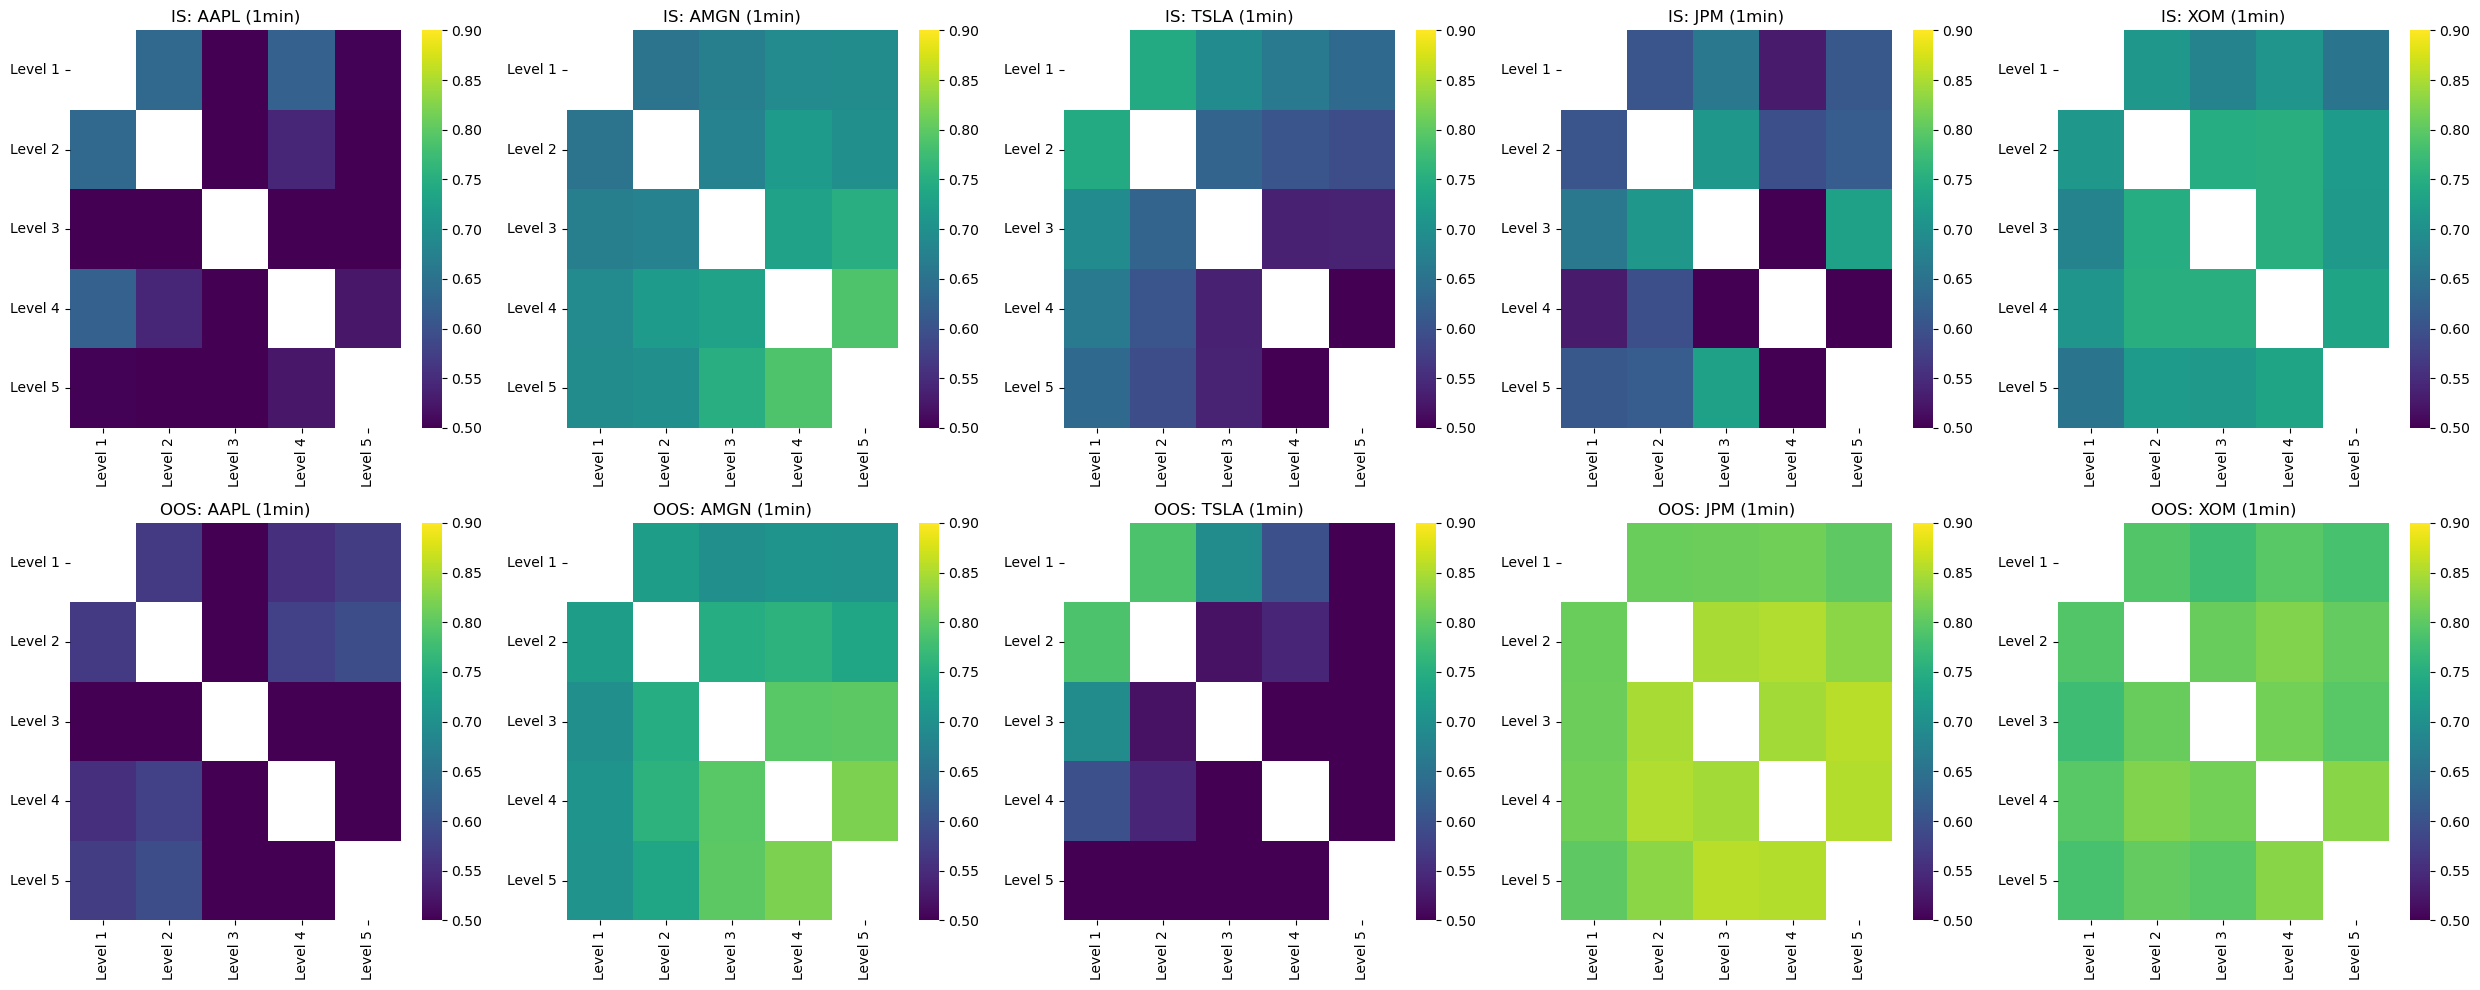

In [41]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10))  # 2 rows, 5 columns

for i, symbol in enumerate(symbols):
    # --- In-sample ---
    all_data = []
    for dt_str in in_sample_dt_strs:
        tmp = pd.read_csv(f'../data/processed/{symbol}_mbp-10_{dt_str}.csv', index_col=0)
        all_data.append(tmp)
    in_sample_data = pd.concat(all_data, axis=0)

    corr_cols = [f"ofi_{str(x).rjust(2, '0')}_{interval}" for x in range(5)]
    corr_matrix = in_sample_data.loc[:, corr_cols].corr()
    np.fill_diagonal(corr_matrix.values, np.nan)

    sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="viridis", cbar=True, ax=axes[0, i], vmin=0.5, vmax=0.9)
    axes[0, i].set_title(f"IS: {symbol} ({interval})")
    axes[0, i].set_xticklabels([f"Level {j+1}" for j in range(5)])
    axes[0, i].set_yticklabels([f"Level {j+1}" for j in range(5)])

    # --- Out-of-sample ---
    all_data = []
    for dt_str in out_of_sample_dt_strs:
        tmp = pd.read_csv(f'../data/processed/{symbol}_mbp-10_{dt_str}.csv', index_col=0)
        all_data.append(tmp)
    oos_data = pd.concat(all_data, axis=0)

    corr_cols = [f"ofi_{str(x).rjust(2, '0')}_{interval}" for x in range(5)]
    corr_matrix = oos_data.loc[:, corr_cols].corr()
    np.fill_diagonal(corr_matrix.values, np.nan)

    sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="viridis", cbar=True, ax=axes[1, i], vmin=0.5, vmax=0.9)
    axes[1, i].set_title(f"OOS: {symbol} ({interval})")
    axes[1, i].set_xticklabels([f"Level {j+1}" for j in range(5)])
    axes[1, i].set_yticklabels([f"Level {j+1}" for j in range(5)])

plt.tight_layout()
plt.show()

In [48]:
in_sample_data['2024-12-03':'2024-12-04']

,symbol,px_1min,r_1min,volume,ofi_00_1min,ofi_01_1min,ofi_02_1min,ofi_03_1min,ofi_04_1min,ofi_I_1min
ts_recv,,,,,,,,,,
2024-12-03 14:45:00+00:00,XOM,117.925,-1.110223e-16,6868.0,-18.261176,-8.896471,-13.110588,-14.047059,11.705882,-8.542722
2024-12-03 14:46:00+00:00,XOM,117.835,-7.634883e-04,6377.0,-19.778529,-41.804617,-31.915353,-26.521209,2.697072,-23.644499
2024-12-03 14:47:00+00:00,XOM,117.855,1.697145e-04,5339.0,-1.035968,10.877666,-10.359682,-1.035968,16.057508,2.881817
2024-12-03 14:48:00+00:00,XOM,117.760,-8.064003e-04,5236.0,-12.695362,-43.672045,-42.656416,-19.804765,-17.265692,-27.386975
2024-12-03 14:49:00+00:00,XOM,117.720,-3.397316e-04,5214.0,19.137992,-7.360766,-6.870048,-29.933783,-1.962871,-5.682451
...,...,...,...,...,...,...,...,...,...,...
2024-12-03 20:41:00+00:00,XOM,117.895,1.696569e-04,6137.0,0.206939,1.655508,6.208156,3.931832,3.104078,3.043771
2024-12-03 20:42:00+00:00,XOM,117.905,8.481764e-05,3771.0,11.252426,-2.411234,2.612170,2.612170,3.817787,3.499929
2024-12-03 20:43:00+00:00,XOM,117.875,-2.544745e-04,3934.0,-4.273588,-16.453313,-8.333496,-4.700946,-5.769343,-7.951071


<Axes: xlabel='ts_recv'>

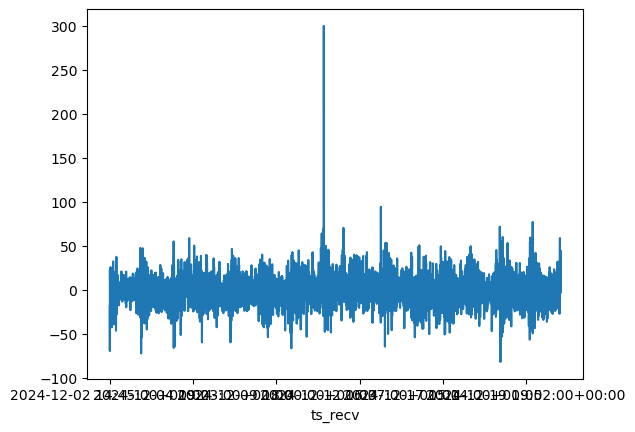

In [43]:
in_sample_data['ofi_00_1min'].plot()

## Section 3 - Contemporaneous Cross-Impact

In [5]:
import statsmodels.formula.api as sm
import pandas_market_calendars
nyse = pandas_market_calendars.get_calendar('NYSE')

Merge all stock csv

In [68]:
# merge all stocks

start_date = '2024-12-05'
end_date = '2024-12-05'
dt_strs = [x.strftime('%Y-%m-%d') for x in nyse.valid_days(start_date=start_date, end_date=end_date)]
symbols = ["AAPL", "AMGN", "TSLA", "JPM", "XOM"]
df = pd.DataFrame()

for symbol in symbols:
    inner = pd.DataFrame()
    for dt_str in dt_strs:
        tmp = process_data(symbol, interval=interval, dt_str=dt_str)
        tmp.index = pd.to_datetime(tmp.index)
        # tmp = tmp.loc[f'{dt_str} 14:45':f'{dt_str} 20:45']
        tmp.columns = [f"{symbol}_{c}" for c in tmp.columns]
        inner = pd.concat([inner, tmp], axis=0)

    df = pd.concat([df, inner], axis=1)

C:\Users\Austin\AppData\Local\Temp\ipykernel_35412\1927754197.py:61: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ofi_df[f'r_{interval}'] = np.log(1 + ofi_df[f'px_{interval}'].pct_change())
C:\Users\Austin\AppData\Local\Temp\ipykernel_35412\1927754197.py:61: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ofi_df[f'r_{interval}'] = np.log(1 + ofi_df[f'px_{interval}'].pct_change())
C:\Users\Austin\AppData\Local\Temp\ipykernel_35412\1927754197.py:61: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading

We must note that before/during market open and after/during market close, the market behaves differently from other times. Therefore, we only focus data between **14:45~20:45 (UTC)** for the following analysis.

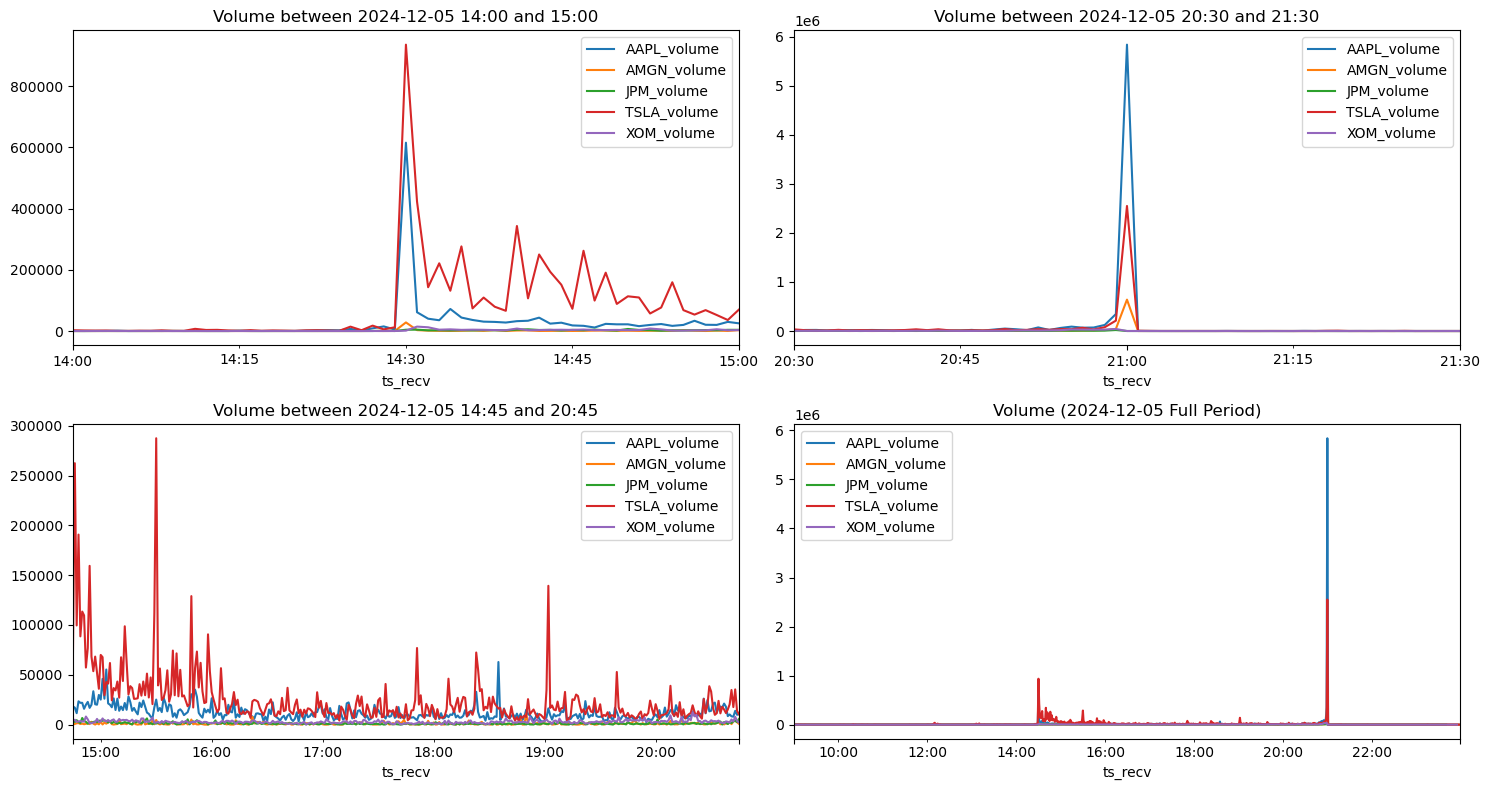

In [72]:
dt_str = '2024-12-05'
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Plot 1
df.loc[
    f'{dt_str} 14:00':f'{dt_str} 15:00',
    ['AAPL_volume', 'AMGN_volume', 'JPM_volume', 'TSLA_volume', 'XOM_volume']
].plot(ax=axes[0, 0])
axes[0, 0].set_title(f'Volume between {dt_str} 14:00 and 15:00')

# Plot 2
df.loc[
    f'{dt_str} 20:30':f'{dt_str} 21:30',
    ['AAPL_volume', 'AMGN_volume', 'JPM_volume', 'TSLA_volume', 'XOM_volume']
].plot(ax=axes[0, 1])
axes[0, 1].set_title(f'Volume between {dt_str} 20:30 and 21:30')

# Plot 3
df.loc[
    f'{dt_str} 14:45':f'{dt_str} 20:45',
    ['AAPL_volume', 'AMGN_volume', 'JPM_volume', 'TSLA_volume', 'XOM_volume']
].plot(ax=axes[1, 0])
axes[1, 0].set_title(f'Volume between {dt_str} 14:45 and 20:45')

# Plot 4
df.loc[dt_str:dt_str,['AAPL_volume', 'AMGN_volume', 'JPM_volume', 'TSLA_volume', 'XOM_volume']].plot(ax=axes[1, 1])
axes[1, 1].set_title(f'Volume ({dt_str} Full Period)')

plt.tight_layout()
plt.show()

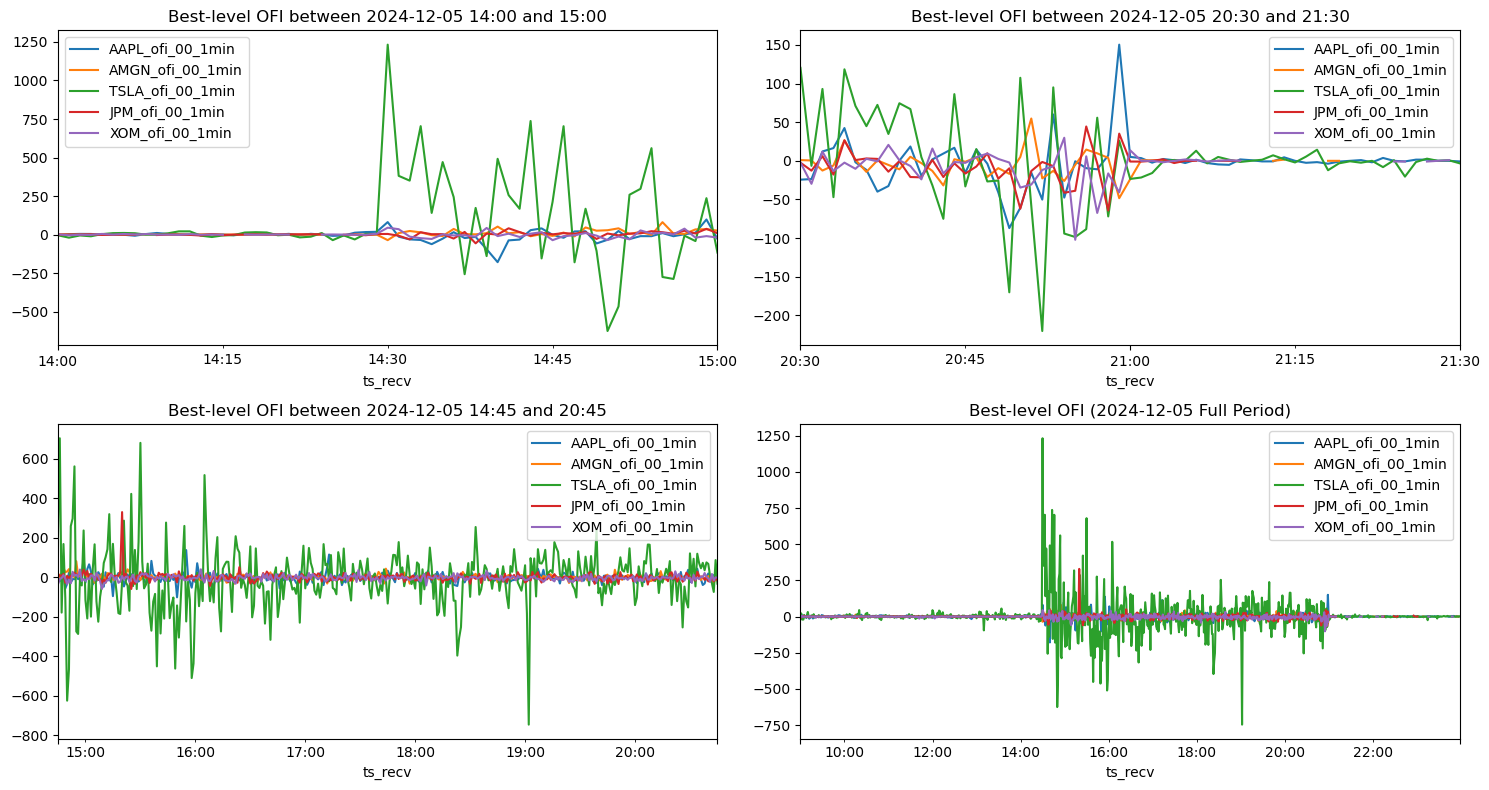

In [71]:
dt_str = '2024-12-05'
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Plot 1
df.loc[
    f'{dt_str} 14:00':f'{dt_str} 15:00',
    [f'{s}_ofi_00_1min' for s in symbols]
].plot(ax=axes[0, 0])
axes[0, 0].set_title(f'Best-level OFI between {dt_str} 14:00 and 15:00')

# Plot 2
df.loc[
    f'{dt_str} 20:30':f'{dt_str} 21:30',
    [f'{s}_ofi_00_1min' for s in symbols]
].plot(ax=axes[0, 1])
axes[0, 1].set_title(f'Best-level OFI between {dt_str} 20:30 and 21:30')

# Plot 3
df.loc[
    f'{dt_str} 14:45':f'{dt_str} 20:45',
    [f'{s}_ofi_00_1min' for s in symbols]
].plot(ax=axes[1, 0])
axes[1, 0].set_title(f'Best-level OFI between {dt_str} 14:45 and 20:45')

# Plot 4
df.loc[
    dt_str:dt_str,
    [f'{s}_ofi_00_1min' for s in symbols]
].plot(ax=axes[1, 1])
axes[1, 1].set_title(f'Best-level OFI ({dt_str} Full Period)')

plt.tight_layout()
plt.show()

Read data again. This time, only merge data between 14:45~20:45.

In [11]:
symbols = ["AAPL", "AMGN", "TSLA", "JPM", "XOM"]
df = pd.DataFrame()

for symbol in symbols:
    inner = pd.DataFrame()
    for dt_str in dt_strs:
        tmp = pd.read_csv(f"../data/processed/{symbol}_mbp-10_{dt_str}.csv", index_col=0)
        tmp.index = pd.to_datetime(tmp.index)
        tmp = tmp.loc[f'{dt_str} 14:45':f'{dt_str} 20:45']
        tmp.columns = [f"{symbol}_{c}" for c in tmp.columns]
        inner = pd.concat([inner, tmp], axis=0)

    df = pd.concat([df, inner], axis=1)

interval = df.columns[1].split('_')[-1]

In [12]:
df.describe()

,AAPL_px_1min,AAPL_r_1min,AAPL_volume,AAPL_ofi_00_1min,AAPL_ofi_01_1min,AAPL_ofi_02_1min,AAPL_ofi_03_1min,AAPL_ofi_04_1min,AAPL_ofi_I_1min,AMGN_px_1min,...,JPM_ofi_I_1min,XOM_px_1min,XOM_r_1min,XOM_volume,XOM_ofi_00_1min,XOM_ofi_01_1min,XOM_ofi_02_1min,XOM_ofi_03_1min,XOM_ofi_04_1min,XOM_ofi_I_1min
count,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,...,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000,5415.000000
mean,247.096116,0.000009,14291.971930,0.383750,-0.860029,0.113641,0.414509,2.301784,0.501409,272.254729,...,0.261592,111.783503,-0.000007,3509.879409,-0.645948,-0.360015,-0.060329,-0.139695,-0.084239,-0.270872
std,4.198770,0.000415,14216.792897,38.319261,34.444783,38.489156,34.873856,34.752296,27.984450,5.713197,...,15.593278,3.785532,0.000498,2940.949181,16.253457,16.690560,14.476567,14.172216,13.796233,13.287334
min,238.395000,-0.002983,645.000000,-432.638227,-945.582273,-1206.282458,-409.018829,-355.406479,-196.731719,254.130000,...,-260.869397,104.850000,-0.002756,190.000000,-81.980239,-157.010405,-110.371664,-134.999777,-110.496702,-69.814840
25%,243.190000,-0.000206,7413.000000,-16.003266,-16.430919,-13.823350,-14.775521,-14.106240,-13.150570,267.992500,...,-8.809119,108.365000,-0.000281,1907.500000,-9.657133,-9.400847,-7.689789,-7.982476,-7.743295,-7.755240
50%,247.555000,0.000000,10992.000000,0.210837,-0.882744,0.000000,0.438170,1.452414,0.029744,273.335000,...,0.305908,112.085000,0.000000,2885.000000,-0.676426,-0.224427,0.000000,-0.268151,0.348907,-0.299287
75%,250.370000,0.000222,16966.000000,15.649128,13.086096,14.103513,15.499794,17.955136,13.887622,276.957500,...,9.297100,114.460000,0.000268,4282.000000,8.349545,9.034747,7.917004,8.033165,7.612418,7.386574
max,254.215000,0.002603,424995.000000,657.884188,458.845275,638.069246,485.180843,462.889130,301.943729,281.235000,...,230.712316,118.370000,0.002986,64153.000000,299.715630,150.974074,78.417218,78.269890,73.082762,105.960573


### Price Impact of best-level OFIs ( $ \textbf{PI}^{[1]} $ )

In [13]:
def regress(df, dependent_var, independent_vars):
    formula = f"{dependent_var} ~ {' + '.join(independent_vars)}"

    model = sm.ols(formula, data=df).fit()
    return model

In [14]:
symbol = 'AAPL'

independent_vars = [f'{symbol}_ofi_00_{interval}']  # Add more as needed
model = regress(df, f'{symbol}_r_{interval}', independent_vars)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_r_1min   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     5696.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        22:28:16   Log-Likelihood:                 36427.
No. Observations:                5415   AIC:                        -7.285e+04
Df Residuals:                    5413   BIC:                        -7.284e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.519e-06   3.94e-06  

In [14]:
symbols

['AAPL', 'AMGN', 'TSLA', 'JPM', 'XOM']

In [15]:
for symbol in symbols:
    independent_vars = [f'{symbol}_ofi_00_{interval}']  # Add more as needed
    model = regress(df, f'{symbol}_r_{interval}', independent_vars)

    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_r_1min   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     8043.
Date:                Thu, 09 Jan 2025   Prob (F-statistic):               0.00
Time:                        10:21:58   Log-Likelihood:                 52955.
No. Observations:                7911   AIC:                        -1.059e+05
Df Residuals:                    7909   BIC:                        -1.059e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.657e-06   3.37e-06  

### Price Impact of integrated OFIs ( $ \textbf{PI}^{I} $ )

In [276]:
symbol = "AAPL"

independent_vars = [f'{symbol}_ofi_I_{interval}']  # Add more as needed
model = regress(df, f'{symbol}_r_{interval}', independent_vars)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_r_1min   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 3.731e+04
Date:                Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                        00:46:14   Log-Likelihood:                 57303.
No. Observations:                7942   AIC:                        -1.146e+05
Df Residuals:                    7940   BIC:                        -1.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.211e-05      2e-06     

### Cross-Impact of best-level OFIs ( $ \textbf{CI}^{[1]} $ )

OLS

In [277]:
this_symbol = "AAPL"

independent_vars = [f'{symbol}_ofi_00_{interval}' for symbol in symbols]  # Add more as needed
model = regress(df, f'{this_symbol}_r_{interval}', independent_vars)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_r_1min   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     1715.
Date:                Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                        01:00:44   Log-Likelihood:                 52180.
No. Observations:                7779   AIC:                        -1.043e+05
Df Residuals:                    7773   BIC:                        -1.043e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         9.382e-06   3.38e-06  

LASSO with CV (detailed statistics to be implemented with R)

In [49]:
from sklearn.linear_model import Lasso, LassoCV

In [130]:
this_symbol = "AAPL"
dependent_var = f'{this_symbol}_r_{interval}'
independent_vars = [f'{symbol}_ofi_00_{interval}' for symbol in symbols]  # Add more as needed

X = df[independent_vars].values
y = df[dependent_var].values

model = LassoCV(cv=5, random_state=0)  # 5-fold cross-validation
model.fit(X, y)

print(f"Selected alpha: {model.alpha_}")
for i, var in enumerate(independent_vars):
    print(f"{var}: {model.coef_[i]}")

Selected alpha: 0.0016566291143948171
AAPL_ofi_00_1min: 1.593041865902379e-06
AMGN_ofi_00_1min: 0.0
TSLA_ofi_00_1min: -0.0
JPM_ofi_00_1min: 0.0
XOM_ofi_00_1min: -0.0


In [132]:
model = Lasso(alpha=0.001)
model.fit(df[independent_vars], df[dependent_var])
# model.summary()
print(model.intercept_)
print(model.coef_)
print(model.alpha)

0.00011931677864061625
[ 1.97431717e-06  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00]
0.001


### Cross-Impact of Integrated OFIs ( $ \textbf{CI}^{I} $ )

In [278]:
[f"ofi_{str(x).rjust(2, '0')}_{interval}" for x in range(5)]

['ofi_00_1min', 'ofi_01_1min', 'ofi_02_1min', 'ofi_03_1min', 'ofi_04_1min']

In [279]:
this_symbol = "AAPL"

independent_vars = [f'{symbol}_ofi_I_{interval}' for symbol in symbols]  # Add more as needed
model = regress(df, f'{this_symbol}_r_{interval}', independent_vars)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            AAPL_r_1min   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     7630.
Date:                Wed, 08 Jan 2025   Prob (F-statistic):               0.00
Time:                        01:01:01   Log-Likelihood:                 57377.
No. Observations:                7942   AIC:                        -1.147e+05
Df Residuals:                    7936   BIC:                        -1.147e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.143e-05   1.99e-06     

In [280]:
this_symbol = "AAPL"

X = df[independent_vars].values
y = df[dependent_var].values

model = LassoCV(cv=5, random_state=0)  # 5-fold cross-validation
model.fit(X, y)

print(f"Selected alpha: {model.alpha_}")
for i, var in enumerate(independent_vars):
    print(f"{var}: {model.coef_[i]}")

Selected alpha: 4.147788936816818e-05
AAPL_ofi_I_1min: 1.311148326321613e-05
AMGN_ofi_I_1min: 1.9677777689189975e-07
TSLA_ofi_I_1min: 3.208791858201553e-08
JPM_ofi_I_1min: 1.38123243384122e-06
XOM_ofi_I_1min: -0.0


In [281]:
model = Lasso(alpha=0.0005)
model.fit(df[independent_vars], df[dependent_var])
# model.summary()
print(model.intercept_)
print(model.coef_)
print(model.alpha)

1.2237405439889937e-05
[1.27084921e-05 0.00000000e+00 4.76196328e-08 0.00000000e+00
 0.00000000e+00]
0.0005


### Forward-looking Price Impact ( $ \textbf{FPI}^{[1]} $ )

Read data

In [3]:
start_date = '2024-12-01'
end_date = '2025-01-02'
dt_strs = [x.strftime('%Y-%m-%d') for x in nyse.valid_days(start_date=start_date, end_date=end_date)]
symbols = ["AAPL", "AMGN", "TSLA", "JPM", "XOM"]
df = pd.DataFrame()

for symbol in symbols:
    inner = pd.DataFrame()
    for dt_str in dt_strs:
        tmp = pd.read_csv(f"../data/processed/{symbol}_mbp-10_{dt_str}.csv", index_col=0)
        tmp.index = pd.to_datetime(tmp.index)
        tmp = tmp.loc[f'{dt_str} 14:45':f'{dt_str} 20:45']
        tmp.columns = [f"{symbol}_{c}" for c in tmp.columns]
        inner = pd.concat([inner, tmp], axis=0)

    df = pd.concat([df, inner], axis=1)

interval = df.columns[1].split('_')[-1]

Create lagged features $ L \in \{ 1,2,3,5,10,20,30 \} $ for all symbols and features. Note that we need to cut data by each days and then apply lag operators because there are gaps between each day. (recall we're only using data between 14:45~20:45 UTC each day.)

In [ ]:
# pseudo
# initialize lagged_df
# for each symbol
    # initialize tmpdf
    # for each segment day
        # apply lag
        # drop rows with na.
        # append/concat tmpdf vertically (axis 0)
    # concat tmpdf tto lagged_df horizontally (axis 1)

In [51]:
lags=[1, 2, 3, 5, 10, 20, 30]
fwds=[1, 2, 3, 5, 10, 20, 30]
symbols = ["AAPL", "AMGN", "TSLA", "JPM", "XOM"]
lagcols = [f'ofi_I_{interval}']
lagcols.extend([f"ofi_{str(x).rjust(2, '0')}_{interval}" for x in range(5)])

lagged_df = pd.DataFrame()
for symbol in symbols:
    cols = [f"{symbol}_{x}" for x in lagcols]

    inner = pd.DataFrame()
    for dt_str in in_sample_dt_strs:
        tmp = pd.read_csv(f"../data/processed/{symbol}_mbp-10_{dt_str}.csv", index_col=0)
        tmp.index = pd.to_datetime(tmp.index)
        tmp.columns = [f'{symbol}_{c}' for c in tmp.columns]
        tmp = tmp.loc[f'{dt_str} 14:45':f'{dt_str} 20:45']

        for fwd in fwds:
            tmp[f'{symbol}_r_{interval}_fwd{fwd}'] = tmp[f'{symbol}_r_{interval}'].shift(-fwd)
        for col in cols:
            for lag in lags:
                tmp[f'{col}_lag{lag}'] = tmp[col].shift(lag)
        inner = pd.concat([inner, tmp], axis=0)
    lagged_df = pd.concat([lagged_df, inner], axis=1)

lagged_df = lagged_df.dropna()

In [52]:
lagged_df.head()

,AAPL_symbol,AAPL_px_1min,AAPL_r_1min,AAPL_volume,AAPL_ofi_00_1min,AAPL_ofi_01_1min,AAPL_ofi_02_1min,AAPL_ofi_03_1min,AAPL_ofi_04_1min,AAPL_ofi_I_1min,...,XOM_ofi_03_1min_lag10,XOM_ofi_03_1min_lag20,XOM_ofi_03_1min_lag30,XOM_ofi_04_1min_lag1,XOM_ofi_04_1min_lag2,XOM_ofi_04_1min_lag3,XOM_ofi_04_1min_lag5,XOM_ofi_04_1min_lag10,XOM_ofi_04_1min_lag20,XOM_ofi_04_1min_lag30
ts_recv,,,,,,,,,,,,,,,,,,,,,
2024-12-02 15:15:00+00:00,AAPL,239.850,0.000521,22924.0,48.058219,36.992182,78.410779,102.756061,1.422776,53.349002,...,13.023896,2.468555,20.335536,-7.643268,-3.095002,-6.881841,-27.358459,12.640840,6.347714,-2.541942
2024-12-02 15:16:00+00:00,AAPL,239.720,-0.000542,16365.0,-22.661364,-21.301682,-11.330682,-17.902477,1.133068,-14.684469,...,-11.021123,-11.764481,-37.156969,0.949575,-7.643268,-3.095002,-1.121927,-3.148892,-36.469892,-74.741030
2024-12-02 15:17:00+00:00,AAPL,239.860,0.000584,11540.0,18.952141,40.848304,78.384583,17.296129,72.128536,43.480626,...,12.223537,52.502578,-1.241468,1.017765,0.949575,-7.643268,-6.881841,17.953319,40.229248,31.864347
2024-12-02 15:18:00+00:00,AAPL,239.835,-0.000104,22965.0,21.057584,25.074349,43.819250,6.451167,64.633394,31.204048,...,1.411075,9.208633,6.229891,14.173203,1.017765,0.949575,-3.095002,4.233224,13.812950,47.922239
2024-12-02 15:19:00+00:00,AAPL,239.650,-0.000772,23239.0,-43.957969,-47.474607,-30.896173,-42.953216,-37.929448,-41.087277,...,-41.019724,6.548406,-21.489325,12.612084,14.173203,1.017765,-7.643268,-35.410189,0.873121,9.810344


In [53]:
from sklearn.linear_model import Lasso, LassoCV

In [59]:
def lasso_lagged_regress(df, dependent_var, independent_vars, lags=[1, 2, 3, 5, 10, 20, 30], fwd=1):
    # Construct the formula with lagged variables
    lagged_vars = [f'{var}_lag{lag}' for var in independent_vars for lag in lags]

    # Separate features (X) and target (y)
    X = df[lagged_vars]
    y = df[f'{dependent_var}_fwd{fwd}']

    # Perform Lasso regression with cross-validation
    # model = LassoCV(cv=5, random_state=0).fit(X, y)  # 5-fold cross-validation
    model = Lasso(alpha=0.0002, random_state=0).fit(X, y)

    return model

thissymbol = 'AAPL'
independent_vars = [f'{thissymbol}_ofi_00_{interval}']
model = lasso_lagged_regress(lagged_df, f'{thissymbol}_r_{interval}', independent_vars)
print(model.coef_)

[-0.00000000e+00 -5.11238931e-08  1.82447713e-08  0.00000000e+00
 -3.37363945e-08 -1.01833533e-07  0.00000000e+00]


In [12]:
def lagged_regress(df, dependent_var, independent_vars, lags=[1, 2, 3, 5, 10, 20, 30], fwd=1):
    # Construct the formula with lagged variables
    lagged_vars = [f'{var}_lag{lag}' for var in independent_vars for lag in lags]
    formula = f"{dependent_var}_fwd{fwd} ~ {' + '.join(lagged_vars)}"

    # Fit the model
    model = sm.ols(formula, data=df).fit()
    return model

# Example usage (as in Section 3 but with lagged features)
thissymbol = 'AAPL'
independent_vars = [f'{thissymbol}_ofi_00_{interval}']
model = lagged_regress(lagged_df, f'{thissymbol}_r_{interval}', independent_vars)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       AAPL_r_1min_fwd1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.127
Date:                Thu, 09 Jan 2025   Prob (F-statistic):              0.343
Time:                        00:23:42   Log-Likelihood:                 41617.
No. Observations:                6488   AIC:                        -8.322e+04
Df Residuals:                    6480   BIC:                        -8.316e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.10

In [8]:
thissymbol = 'TSLA'
independent_vars = [f'{thissymbol}_ofi_00_{interval}']
model = lagged_regress(lagged_df, f'{thissymbol}_r_{interval}', independent_vars)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TSLA_r_1min_fwd1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9460
Date:                Thu, 09 Jan 2025   Prob (F-statistic):              0.469
Time:                        00:21:23   Log-Likelihood:                 33557.
No. Observations:                6488   AIC:                        -6.710e+04
Df Residuals:                    6480   BIC:                        -6.704e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4.14

### Forward-looking Cross-Price Impact ( $ \textbf{FCI}^{[1]} $ )

In [9]:
thissymbol = 'TSLA'
independent_vars = [f'{symbol}_ofi_00_{interval}' for symbol in symbols]
model = lagged_regress(lagged_df, f'{thissymbol}_r_{interval}', independent_vars)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TSLA_r_1min_fwd1   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.167
Date:                Thu, 09 Jan 2025   Prob (F-statistic):              0.230
Time:                        00:21:26   Log-Likelihood:                 33574.
No. Observations:                6488   AIC:                        -6.708e+04
Df Residuals:                    6452   BIC:                        -6.683e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -2.82

### Forward-looking Price Impact ( $ \textbf{FPI}^{I} $ )

In [10]:
thissymbol = 'TSLA'
independent_vars = [f'{thissymbol}_ofi_I_{interval}']
model = lagged_regress(lagged_df, f'{thissymbol}_r_{interval}', independent_vars)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TSLA_r_1min_fwd1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.545
Date:                Thu, 09 Jan 2025   Prob (F-statistic):              0.147
Time:                        00:21:28   Log-Likelihood:                 33559.
No. Observations:                6488   AIC:                        -6.710e+04
Df Residuals:                    6480   BIC:                        -6.705e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -4.261e-

### Forward-looking Cross Price Impact ( $ \textbf{FPI}^{[1]} $ )

In [11]:
thissymbol = 'TSLA'
independent_vars = [f'{symbol}_ofi_I_{interval}' for symbol in symbols]
model = lagged_regress(lagged_df, f'{thissymbol}_r_{interval}', independent_vars)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       TSLA_r_1min_fwd1   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.166
Date:                Thu, 09 Jan 2025   Prob (F-statistic):              0.231
Time:                        00:21:31   Log-Likelihood:                 33574.
No. Observations:                6488   AIC:                        -6.708e+04
Df Residuals:                    6452   BIC:                        -6.683e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -7.069e-